July

22 sept 2025

In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np

labels = np.zeros((265, 10))
np.save("1NE4_6NO7_b_labels.npy", labels)

In [3]:
from MDFeaturePipeline import MDFeaturePipeline
from MDFeaturePipeline import MDFeaturizer

# Load the trajectory
trajectory_file = "/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.dcd"
topology_file = "/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.godmd.pdb"
input_labels_file = "1NE4_6NO7_b_labels.npy"
output_file = "1NE4_6NO7_b.dcd.pt"
output_stats_file = "1NE4_6NO7_b.dcd.stats.pt"


# trajectory_file = "/home/pzanders/Documents/AI/Models/molearn/molearn/examples/clustered/MurDopen_CLUSTER_aggl_train.dcd"
# topology_file = "/home/pzanders/Documents/AI/Models/molearn/molearn/examples/clustered/MurDopen_NEW_TOPO.pdb"
# input_labels_file = "/home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/data/Four_Well_beta3_gamma4_init_label10.npy"
# output_file = "./MurDopen_CLUSTER_aggl_train.dcd.pt"
# output_stats_file = "./MurDopen_CLUSTER_aggl_train.dcd.stats.pt"

properties = {
    'cartesian': {'selection': 'backbone'},
    # 'distances': {'selection': 'name CA', 
    #               'cutoff': 0.4, 
    #               'periodic': True,
    #               'bonded': False},
    # 'angles': {'selection': 'backbone', 
    #            'periodic': True, 
    #            'bonded': True},
    # 'dihedrals': {'selection': 'backbone', 
    #               'periodic': True, 
    #               'bonded': True},
    'options': {'timelag': 10}, 
    #             'norm_in': {'mode': 'min_max'}
    #             },
    'remove_tmp': True,
    'disable_sandbox': True,
    'disable_logs': True,   # No va
}

MDFeaturizer(
    input_trajectory_path=trajectory_file,
    input_topology_path=topology_file,
    input_labels_npy_path=input_labels_file,
    output_dataset_pt_path=output_file,
    output_stats_pt_path=output_stats_file,
    properties=properties
)

# # Class_object
featurizer = MDFeaturePipeline(
    input_trajectory_path=trajectory_file,
    input_topology_path=topology_file,
    # input_labels_npy_path=input_labels_file,
    output_dataset_pt_path=output_file,
    output_stats_pt_path=output_stats_file,
    properties=properties
)
print(featurizer.dataset)
#n_features = featurizer.featurizer.n_features


/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


2025-07-26 22:46:41,579 [MainThread  ] [INFO ]  ## BioBB Featurization - MDFeaturePipeline ##
2025-07-26 22:46:41,579 [MainThread  ] [INFO ]  Obtaining the topology information from /home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.godmd.pdb
2025-07-26 22:46:41,598 [MainThread  ] [INFO ]  Available Topology Properties:
2025-07-26 22:46:41,599 [MainThread  ] [INFO ]    - Number of chains: 1
2025-07-26 22:46:41,599 [MainThread  ] [INFO ]    - Number of residues: 268
2025-07-26 22:46:41,599 [MainThread  ] [INFO ]    - Number of atoms: 268
2025-07-26 22:46:41,599 [MainThread  ] [INFO ]    - Number of distances: N/A
2025-07-26 22:46:41,599 [MainThread  ] [INFO ]    - Number of angles: N/A
2025-07-26 22:46:41,600 [MainThread  ] [INFO ]    - Number of dihedrals: N/A
2025-07-26 22:46:41,607 [MainThread  ] [INFO ]  Available Trajectory Properties:
2025-07-26 22:46:41,607 [MainThread  ] [INFO ]     - Number of frames: 275
2025-07-26 22:46:41,608 [MainThread  ] [INFO ]  Featurizing th

/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/biobb_common/generic/biobb_object.py:154: UserWarning: Warning: disable_logs is not a recognized property. The most similar property is: disable_sandbox
  warnings.warn(


2025-07-26 22:46:41,780 [MainThread  ] [INFO ]  Dataset saved in .pt format in /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/1NE4_6NO7_b.dcd.pt
2025-07-26 22:46:41,781 [MainThread  ] [INFO ]  File size: 2.29 MB
2025-07-26 22:46:41,803 [MainThread  ] [INFO ]  Dataset statistics saved in .pt format in /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/1NE4_6NO7_b.dcd.stats.pt
2025-07-26 22:46:41,804 [MainThread  ] [INFO ]  File size: 48.46 KB
2025-07-26 22:46:41,804 [MainThread  ] [INFO ]  Removed: []
2025-07-26 22:46:41,806 [MainThread  ] [INFO ]  ## BioBB Featurization - MDFeaturePipeline ##
2025-07-26 22:46:41,807 [MainThread  ] [INFO ]  Obtaining the topology information from /home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.godmd.pdb
2025-07-26 22:46:41,816 [MainThread  ] [INFO ]  Available Topology Properties:
2025-07-26 22:46:41,816 [MainThread  ] [INFO ]    - Number of chains: 1
2025-07-26 22:46:41,817 [MainThread  ] [INFO ]   

In [4]:
import sys
sys.path.append("..")

from build_model import BuildModel
from build_model import buildModel

# Build the model

input_stats_path = "./MurDopen_CLUSTER_aggl_train.dcd.stats.pt" 
#input_stats_path = "../data/Four_Well_beta3_gamma4_traj_data_stats.pt"
input_stats_path = "1NE4_6NO7_b.dcd.stats.pt"
output_model_pth_file = "test_model.pth"

n_features = 804

properties = {
    'model_type': 'GaussianMixtureVariationalAutoEncoder',
    'n_cvs': 2,
    'encoder_layers': [n_features, 16, 16],        
    'decoder_layers': [16, 16, n_features],
    'options': {
        "k": 5,
        # "encoder": {
        #     "activation": "relu",
        #     "last_layer_activation": False,
        # },
        # "decoder": {
        #     "activation": "relu",
        #     "last_layer_activation": "sigmoid", #"logsoftmax",
        # },
        "norm_in": {"mode": "min_max"},  # Re-enable norm_in for normalization
        "optimizer": {"lr": 1e-4},
        #'loss_function': {"loss_type": 'MSELoss'}, 
                           #"physics_scaling_factor": 0.1
                           },
}

# # Ensure decoder_layers[-1] matches k
num_states = 10  # Must match options['k']
properties = {
    'model_type': 'SPIB',
    'n_cvs': 1,
    'encoder_layers': [n_features, 64, 32],
    'decoder_layers': [32, 64, num_states],
    'options': {
        #'norm_in': {'mode': 'min_max'},  # Re-enable norm_in for normalization
        'optimizer': {'lr': 0.001, 'weight_decay': 1e-5},
        'UpdateLabel': True,
        'patience': 5,
        'refinements': 3,
        'threshold': 1e-3,
        'k': num_states,
        'loss_function': {
            'loss_type': 'InformationBottleneckLoss',
            'beta': 1.0,  # Required parameter
            'eps': 1e-8,  # Optional, default value for numerical stability
        }
    }
}

n_features = 804
# properties = {
#     "model_type": "GaussianMixtureVariationalAutoEncoder",
#     "n_cvs": 3,
#     "encoder_layers": {"qy_dims": [n_features, 32],
#                       "qz_dims":  [16, 16]},
#     "decoder_layers": {"pz_dims": [16, 16],
#                       "px_dims":  [128]},
                      
#     "options": {
#         "norm_in": {"mode": "mean_std"},
        
#         "k": 4,

#         "encoder": {"qy_nn": {"activation": 'relu', "dropout": 0.0, "last_layer_activation": 'relu'},
#                     "qz_nn": {"activation": 'relu', "dropout": 0.0, "last_layer_activation": 'relu'}},
#         "decoder": {"pz_nn": {"activation": 'relu', "dropout": 0.0, "last_layer_activation": 'relu'},
#                     "px_nn": {"activation": 'relu', "dropout": 0.0, "last_layer_activation": 'relu'}},

#         "loss_function": {"loss_type": 'ELBOGaussianMixtureLoss', "k": 4, "r_nent": 0.5},

#         "optimizer": {
#                 "lr": 1e-4
#         }
#     }
# }

# properties = {
#     "model_type": "VariationalAutoEncoder",
#     "n_cvs": 3,
#     "encoder_layers": [n_features, 32],
#     "decoder_layers": [32, n_features],
                      
#     "options": {
#         "norm_in": {"mode": "mean_std"},
        
#         "encoder": {"activation": 'relu', "dropout": 0.0, "last_layer_activation": False},
                
#         "decoder": {"activation": 'relu', "dropout": 0.0, "last_layer_activation": 'relu'},

#         "optimizer": {
#                 "lr": 1e-4
#         }
#     }
# }

# model_builder = BuildModel(output_model_pth_path=output_model_pth_file,
#                            properties=properties)

buildModel(input_stats_pt_path=input_stats_path,
           output_model_pth_path=output_model_pth_file,
           properties=properties)

model = BuildModel(input_stats_pt_path=input_stats_path,
                  output_model_pth_path=output_model_pth_file,
                  properties=properties).model


2025-07-26 22:46:42,516 [MainThread  ] [INFO ]  Copy: 1NE4_6NO7_b.dcd.stats.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/62c932e7-bc2f-4894-bdf1-1852702e3ea6
2025-07-26 22:46:42,519 [MainThread  ] [INFO ]  ## BioBB AutoEncoder Builder ##
2025-07-26 22:46:42,519 [MainThread  ] [INFO ]  
2025-07-26 22:46:42,519 [MainThread  ] [INFO ]  Hyperparameters:
2025-07-26 22:46:42,519 [MainThread  ] [INFO ]  ----------------
2025-07-26 22:46:42,519 [MainThread  ] [INFO ]  model_type: SPIB
2025-07-26 22:46:42,520 [MainThread  ] [INFO ]  n_cvs: 1
2025-07-26 22:46:42,520 [MainThread  ] [INFO ]  encoder_layers: [804, 64, 32]
2025-07-26 22:46:42,520 [MainThread  ] [INFO ]  decoder_layers: [32, 64, 10]
2025-07-26 22:46:42,520 [MainThread  ] [INFO ]  loss_function: InformationBottleneckLoss(beta=1.0, eps=1e-08)
2025-07-26 22:46:42,520 [MainThread  ] [INFO ]  options:
2025-07-26 22:46:42,521 [MainThread  ] [INFO ]     optimizer: {'lr': 0.001, 'weight_decay': 1e-05}
2025-07-26

In [5]:
from train_model import TrainModel
from train_model import trainModel

properties = {
    'Dataset': {
        'batch_size': 12,
        'split': {'random_split': True,
                  'train_prop': 0.9,
                  'val_prop': 0.1,
        }
    },
    'Trainer': {
        'max_epochs': 100,
        'enable_checkpointing': False,
        'callbacks': {},
        
    },
    'disable_sandbox': True
}

# load the model
input_model_pth_file = "test_model.pth"
input_dataset_pt_path = "./MurDopen_CLUSTER_aggl_train.dcd.pt"
input_model_pth_file = "test_model.pth"
input_dataset_pt_path =  "1NE4_6NO7_b.dcd.pt"
#input_dataset_pt_path = "../data/Four_Well_beta3_gamma4_traj_data.pt"
output_model_pth_file = "test_model.pth"
output_model_metrics_file = "test_model_metrics.npz"


# model =  TrainModel(
#     input_model_pth_path=input_model_pth_file,
#     input_dataset_pt_path=input_dataset_pt_path,
#     output_model_pth_path=output_model_pth_file,
#     output_metrics_npz_path=output_model_metrics_file,
#     properties=properties
# ).launch()

trainModel(
    input_model_pth_path=input_model_pth_file,
    input_dataset_pt_path=input_dataset_pt_path,
    output_model_pth_path=output_model_pth_file,
    output_metrics_npz_path=output_model_metrics_file,
    properties=properties
)

2025-07-26 22:46:42,544 [MainThread  ] [INFO ]  ## BioBB Model Trainer ##
2025-07-26 22:46:42,545 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/test_model.pth
2025-07-26 22:46:42,547 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/1NE4_6NO7_b.dcd.pt
2025-07-26 22:46:42,557 [MainThread  ] [INFO ]  Start training...


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name                   | Type                      | Params | Mode  | In sizes | Out sizes
----------------------------------------------------------------------------------------------------
0 | representative_weights | Sequential                | 10     | train | ?        | ?        
1 | encoder                | FeedForward               | 53.6 K | train | [1, 804] | [1, 32]  
2 | encoder_mean           | Linear                    | 33     | train | [1, 32]  | [1, 1]   
3 | encoder_logvar         | Linear                    | 33     | train | [1, 32]  | [1, 1]   
4 | decoder                | FeedForward               | 2.8 K  | train | ?        | ?        
5 | loss_fn                | InformationBottleneckLoss | 0      | train | ?        | ?        
----------------------------------------------------------------------------------------------------
56.5 K    Trainable p

/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (20) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 99: 100%|██████████| 20/20 [00:00<00:00, 156.79it/s, v_num=83, train_loss_step=18.10, train_recon_step=0.000, train_kl_step=18.10, valid_loss_step=17.90, valid_recon_step=0.000, valid_kl_step=17.90, valid_loss_epoch=17.90, valid_recon_epoch=0.000, valid_kl_epoch=17.90, train_loss_epoch=18.00, train_recon_epoch=0.000, train_kl_epoch=18.00]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 20/20 [00:00<00:00, 151.20it/s, v_num=83, train_loss_step=18.10, train_recon_step=0.000, train_kl_step=18.10, valid_loss_step=17.90, valid_recon_step=0.000, valid_kl_step=17.90, valid_loss_epoch=17.90, valid_recon_epoch=0.000, valid_kl_epoch=17.90, train_loss_epoch=18.00, train_recon_epoch=0.000, train_kl_epoch=18.00]
2025-07-26 22:46:56,587 [MainThread  ] [INFO ]  Training Metrics saved to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/test_model_metrics.npz
2025-07-26 22:46:56,588 [MainThread  ] [INFO ]  File size: 7.44 KB
2025-07-26 22:46:56,591 [MainThread  ] [INFO ]  Trained Model saved to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/test_model.pth
2025-07-26 22:46:56,592 [MainThread  ] [INFO ]  File size: 263.85 KB
2025-07-26 22:46:56,593 [MainThread  ] [INFO ]  Removed: []


0

In [6]:
import sys
sys.path.append("..")  # Ensure the parent directory is in the path
from evaluate_model import evaluateModel
from evaluate_model import EvaluateModel

# Evaluate the model
input_model_pth_path = "test_model.pth"
input_dataset_pt_path = "./MurDopen_CLUSTER_aggl_train.dcd.pt"
input_dataset_pt_path =  "1NE4_6NO7_b.dcd.pt"
#input_dataset_pt_path = "../data/Four_Well_beta3_gamma4_traj_data.pt"
output_model_results_file = "test_model_results.npz"

properties = {
    'Dataset': {
        'batch_size': 64,
        
        }
    }

evaluateModel(
    input_model_pth_path=input_model_pth_path,
    input_dataset_pt_path=input_dataset_pt_path,
    output_results_npz_path=output_model_results_file,
    properties=properties
)
# EvaluateModel(
#     input_model_pth_path=input_model_pth_path,
#     input_dataset_pt_path=input_dataset_pt_path,
#     output_results_npz_path=output_model_results_file,
#     properties=properties
# )

2025-07-26 22:46:56,612 [MainThread  ] [INFO ]  ## BioBB Model Evaluator ##
2025-07-26 22:46:56,614 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/684b3e0f-540c-4d2e-aa02-3b040083d27c
2025-07-26 22:46:56,616 [MainThread  ] [INFO ]  Copy: 1NE4_6NO7_b.dcd.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/684b3e0f-540c-4d2e-aa02-3b040083d27c
2025-07-26 22:46:56,617 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/test_model.pth
2025-07-26 22:46:56,619 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/1NE4_6NO7_b.dcd.pt
2025-07-26 22:46:56,629 [MainThread  ] [INFO ]  Start evaluating...
2025-07-26 22:46:56,639 [MainThread  ] [INFO ]  Evaluation Results saved to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/test_model_results.npz
2025-07-26 22:46:56,640 [M

/home/pzanders/miniconda3/envs/mdaenv/lib/python3.12/site-packages/lightning/pytorch/core/module.py:445: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`


0

In [6]:
import sys
sys.path.append("..")  # Ensure the parent directory is in the path
from decode_model import evaluateDecoder
from decode_model import EvaluateDecoder

# Evaluate the model
input_model_pth_path = "test_model.pth"
input_dataset_npy_path =  "test_model_z.npy"
#input_dataset_pt_path = "../data/Four_Well_beta3_gamma4_traj_data.pt"
output_model_results_file = "test_model_results2.npz"

properties = {
    'Dataset': {
        'batch_size': 64,
        
        }
    }


evaluateDecoder(
    input_model_pth_path=input_model_pth_path,
    input_dataset_npy_path=input_dataset_npy_path,
    output_results_npz_path=output_model_results_file,
    properties=properties
)


2025-07-24 21:06:10,273 [MainThread  ] [INFO ]  ## BioBB Model Evaluator ##
2025-07-24 21:06:10,275 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/2d36578f-6bd3-4af3-a727-6e0955e8bb47
2025-07-24 21:06:10,276 [MainThread  ] [INFO ]  Copy: test_model_z.npy to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/2d36578f-6bd3-4af3-a727-6e0955e8bb47
2025-07-24 21:06:10,277 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/test_model.pth
2025-07-24 21:06:10,279 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/test_model_z.npy
2025-07-24 21:06:10,280 [MainThread  ] [INFO ]  Start evaluating...


AttributeError: 'AutoEncoder' object has no attribute 'decode'

In [37]:
import sys
sys.path.append("..")  # Ensure the parent directory is in the path
from encode_model import evaluateEncoder
from encode_model import EvaluateEncoder

# Evaluate the model
input_model_pth_path = "test_model.pth"
input_dataset_pt_path =  "1NE4_6NO7_b.dcd.pt"
#input_dataset_pt_path = "../data/Four_Well_beta3_gamma4_traj_data.pt"
output_model_results_file = "test_model_results2.npz"

properties = {
    'Dataset': {
        'batch_size': 64,
        
        }
    }


evaluateEncoder(
    input_model_pth_path=input_model_pth_path,
    input_dataset_pt_path=input_dataset_pt_path,
    output_results_npz_path=output_model_results_file,
    properties=properties
)

2025-07-26 19:50:17,097 [MainThread  ] [INFO ]  ## BioBB Model Evaluator ##
2025-07-26 19:50:17,118 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/2adacedc-93cc-4b4e-9075-069ad3c0e256
2025-07-26 19:50:17,120 [MainThread  ] [INFO ]  Copy: 1NE4_6NO7_b.dcd.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/2adacedc-93cc-4b4e-9075-069ad3c0e256
2025-07-26 19:50:17,121 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/test_model.pth
2025-07-26 19:50:17,122 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/1NE4_6NO7_b.dcd.pt
2025-07-26 19:50:17,130 [MainThread  ] [INFO ]  Start evaluating...
2025-07-26 19:50:17,136 [MainThread  ] [INFO ]  Evaluation Results saved to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/test_model_results2.npz
2025-07-26 19:50:17,136 [

0

Shape of z: torch.Size([265, 10])
Max positions: tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3])
Predicted labels: torch.Size([265, 10])
Data shape: (265, 8

/tmp/ipykernel_132133/3486475171.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cMap = c.get_cmap('tab10', len(state_labels))


Text(0, 0.5, 'y')

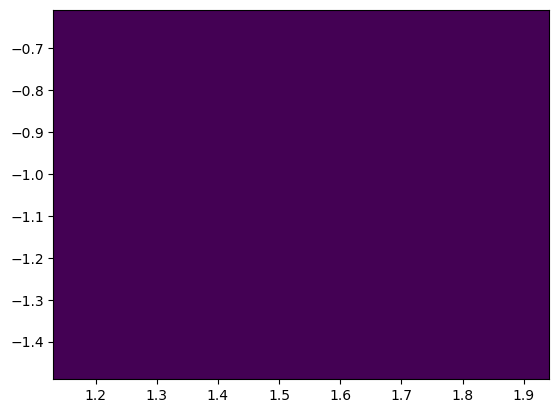

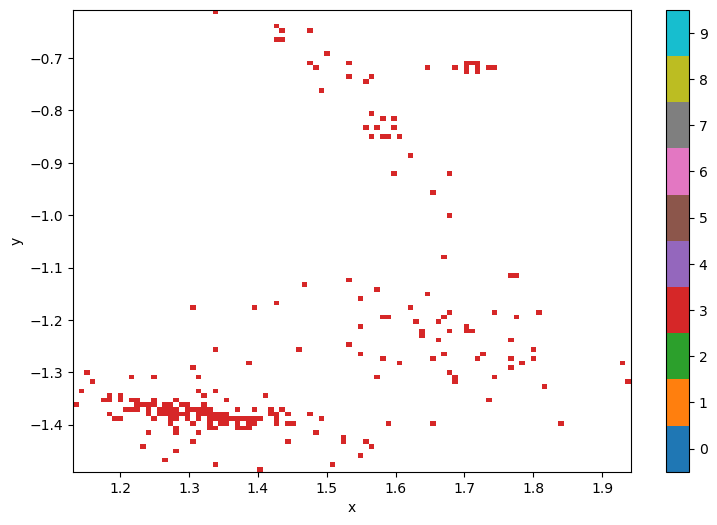

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib
import matplotlib.cm as c


x = np.load("test_model_results.npz", allow_pickle=True)

z = torch.tensor(x['xhat'])
print("Shape of z:", z.shape)
pred = z.exp()
max_pos = pred.argmax(1)
print("Max positions:", max_pos)
# Convert max_pos to one-hot encoding
labels = F.one_hot(max_pos, num_classes=10)
print("Predicted labels:", labels.shape)

data= torch.load("1NE4_6NO7_b.dcd.pt")
data = data['data']

print("Data shape:", data.shape)
labels=labels
hist=plt.hist2d(data[:,0],data[:,1],bins=100)

print(labels.shape)
state_num=labels.shape[1]
state_labels=np.arange(state_num)

hist_state=np.zeros([state_num]+list(hist[0].shape))

for i in range(state_num):
    hist_state[i]=plt.hist2d(data[:,0],data[:,1],bins=[hist[1],hist[2]],weights=labels[:,i])[0]

label_map50=np.argmax(hist_state,axis=0).astype(float)
label_map50[hist[0]==0]=np.nan

fig, ax = plt.subplots(figsize=(9,6))

fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: state_labels[x])
tickz = np.arange(0,len(state_labels))

cMap = c.get_cmap('tab10', len(state_labels))
im=ax.pcolormesh(hist[1], hist[2], label_map50.T, cmap=cMap, vmin=-0.5, vmax=len(state_labels)-0.5)
cb1 = fig.colorbar(im,ax=ax,format=fmt, ticks=tickz)


plt.xlabel("x")
plt.ylabel("y")

In [ ]:
import torch
model = torch.load(output_model_pth_file)
print(model)
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F

# 1. Prepare your test DataLoader
#    Assumes your dataset returns dicts with key "data" or "target"
test_data = torch.load(input_dataset_pt_path)['data']
test_loader = DataLoader(test_data, batch_size=256, shuffle=False)

# 2. Put model in eval mode and move to right device
model.eval()
device = next(model.parameters()).device

# 3. Loop over test batches and collect
all_outs = []
all_z    = []
all_zmu  = []
all_zlv  = []
all_pred = []
all_labels = []

# (rep_mu, rep_logvar, w) are fixed given your representative inputs
with torch.no_grad():
    rep_mu, rep_logvar = model.encode(model.representative_inputs.to(device))
    w = model.representative_layer(model.idle_input.to(device))
    
    for batch in test_loader:
        x = batch.to(device)
        
        # run the encode–decode
        out, z, z_mu, z_logvar, _, _, _ = model.encode_decode(x)
        
        # get discrete labels as the argmax state
        probs  = out.exp()                        # decoder gives log-probs
        preds = probs.argmax(dim=1)                 # shape [B, k]
        labels = F.one_hot(preds, num_classes=model.num_states)             # shape [B]

        
        # store
        all_outs.append(out.cpu())
        all_z.append(z.cpu())
        all_zmu.append(z_mu.cpu())
        all_zlv.append(z_logvar.cpu())
        all_pred.append(preds.cpu())  # [B, k]
        all_labels.append(labels.cpu())

# 4. (Optional) concatenate for a full-array view
all_outs   = torch.cat(all_outs,   dim=0)  # [N, k]
all_z      = torch.cat(all_z,      dim=0)  # [N, n_cvs]
all_zmu    = torch.cat(all_zmu,    dim=0)  # [N, n_cvs]
all_zlv    = torch.cat(all_zlv,    dim=0)  # [N, n_cvs]
all_pred   = torch.cat(all_pred,   dim=0)  # [N, k]
all_labels = torch.cat(all_labels, dim=0)  # [N]


In [ ]:
print(all_pred)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(test_data[:, 0], test_data[:, 1], c=all_pred, cmap='viridis', s=1)
plt.colorbar(label='State Labels')
plt.xlabel('CV 1')
plt.ylabel('CV 2')
plt.title('SPIB Model Latent Space')
plt.show()

In [ ]:
import torch
output_model_pth_file = "./test_model.pth"
input_dataset_pt_path = "./MurDopen_CLUSTER_aggl_train.dcd.pt"
#model = torch.load(output_model_pth_file)
x = torch.load(input_dataset_pt_path)



import lightning
from mlcolvar.utils.trainer import MetricsCallback
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from mlcolvar.data import DictModule
from mlcolvar.data import DictDataset

x = torch.load(input_dataset_pt_path)
x = x['data']
x = x.reshape(x.shape[0], 3, -1)
dataset = DictDataset({"data": torch.tensor(x)},)
print(dataset)

datamodule = DictModule(dataset,
                        batch_size = 2,
                        lengths=[0.8, 0.2],
                        shuffle = False)
print(datamodule)

# # define callbacks
# metrics = MetricsCallback()

# # Early stopping
# early_stopping = EarlyStopping(
#     monitor="valid_loss",
#     patience=10,
#     verbose=True,
#     mode="min",
# )

# # define hyperparameters
# max_epochs = 35
# logger = None  #lightning.pytorch.loggers.TensorBoardLogger(save_dir="logs/", name="test", version=0)
# enable_checkpointing = False

# # define trainer
# trainer = lightning.Trainer(callbacks=[metrics],  # [early_stopping, metrics]
#                             max_epochs=max_epochs,
#                             logger=logger,
#                             enable_checkpointing=enable_checkpointing,
#                             )
# print(trainer.logger)
# import torch

# # wrap the logger’s log_hyperparams so we can scan metrics first
# orig_log_hparams = trainer.logger.log_hyperparams

# def debug_log_hparams(params, metrics=None):
#     metrics = metrics or {}
#     for k, v in metrics.items():
#         if isinstance(v, torch.Tensor):
#             arr = v.detach().cpu().numpy()
#             print(f"🔍  Found tensor for key: {k!r}, shape={arr.shape}")
#             if arr.ndim == 0:
#                 print(f"⚠️  Zero-dim tensor found for key: {k!r}, shape={arr.shape}")
#     # now call the real logger (which will crash if you leave it on)
#     return orig_log_hparams(params, metrics)

# trainer.logger.log_hyperparams = debug_log_hparams

# trainer.fit(model, datamodule)

In [8]:
import sys
sys.path.append("..")  # Ensure the parent directory is in the path
from LRP import relevancePropagation
#from analysis.layerwise_relevance_prop import RelevancePropagation

properties = {
    'Dataset': {
        'batch_size': 64,
    }
}

input_model_pth_file = "test_model.pth" 
input_dataset_pt_path = "1NE4_6NO7_b.dcd.pt"  # Path to the dataset file

relevancePropagation(
    input_model_pth_path=input_model_pth_file,
    input_dataset_pt_path=input_dataset_pt_path,
    output_results_npz_path="test_model_relevance.npz",
    properties=properties
)   

2025-07-24 21:06:32,161 [MainThread  ] [INFO ]  ## BioBB Relevance Propagation ##
2025-07-24 21:06:32,183 [MainThread  ] [INFO ]  Copy: test_model.pth to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/5758624b-e140-47a6-afc7-daf77a89282a
2025-07-24 21:06:32,185 [MainThread  ] [INFO ]  Copy: 1NE4_6NO7_b.dcd.pt to /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/5758624b-e140-47a6-afc7-daf77a89282a
2025-07-24 21:06:32,185 [MainThread  ] [INFO ]  Load model from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/test_model.pth
2025-07-24 21:06:32,188 [MainThread  ] [INFO ]  Load dataset from /home/pzanders/Documents/BSC/BioExcel/biobb/biobb_pytorch/mdae/Tests/1NE4_6NO7_b.dcd.pt
2025-07-24 21:06:32,193 [MainThread  ] [INFO ]  Start LRP analysis...


AttributeError: 'Normalization' object has no attribute 'std'

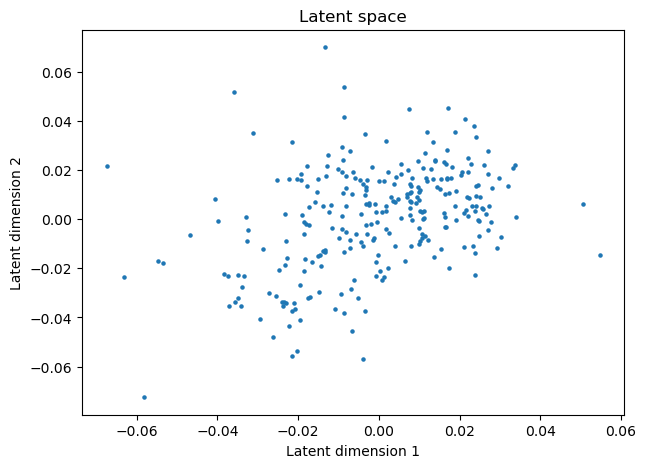

In [94]:
import torch
from mlcolvar.data.dataset import DictDataset
import matplotlib.pyplot as plt

dataset = torch.load(input_dataset_pt_path)
dataset = DictDataset(dataset)
data = dataset['data']

model = torch.load(output_model_pth_file)
model.to("cpu")

model.eval()
with torch.no_grad():
    z = model(data)

plt.figure(figsize=(7, 5))
plt.scatter(z[:, 0], z[:, 1], s=5)
plt.title("Latent space")
plt.xlabel("Latent dimension 1")
plt.ylabel("Latent dimension 2")
plt.show()
    

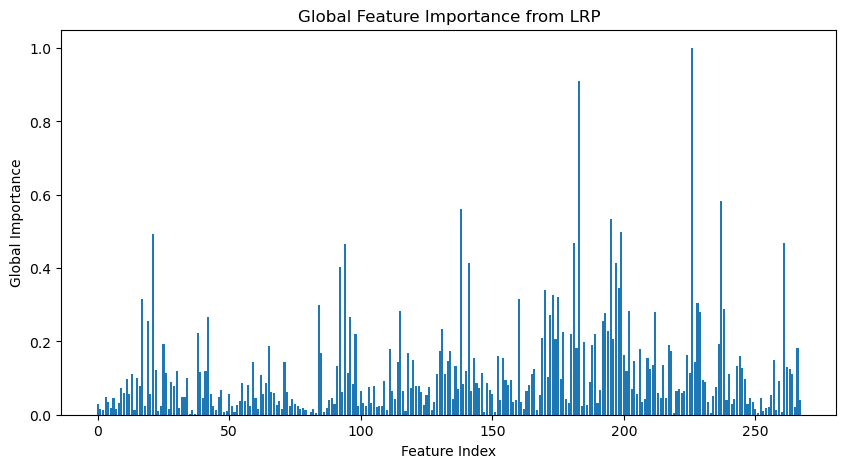

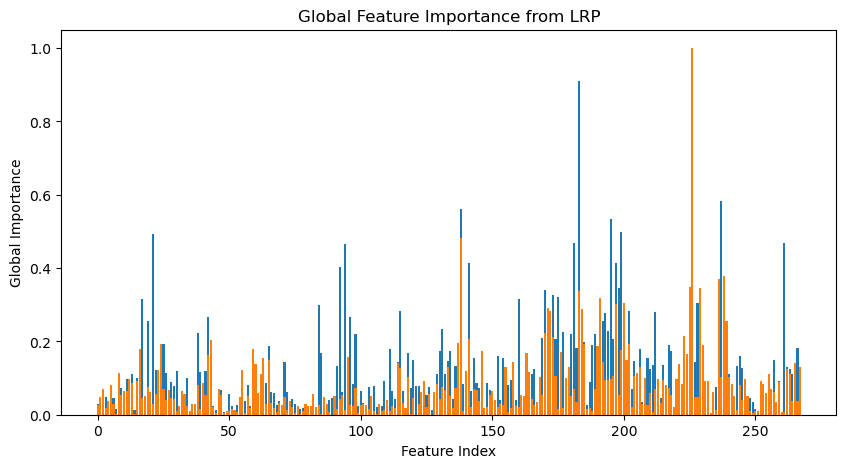

In [92]:

import torch
import torch.nn as nn
import torch.nn.functional as F

def lrp_encoder(model, x, latent_index=None, eps=1e-6):
    """
    Generalized Layer-wise Relevance Propagation for various autoencoder models.
    
    Supports:
    - AutoEncoder
    - VariationalAutoEncoder
    - SPIB
    - GaussianMixtureVariationalAutoEncoder
    
    For GaussianMixtureVariationalAutoEncoder, it handles the clustered structure.
    For others, treats as standard MLP encoder via forward_cv.
    
    Args:
        model: The model instance.
        x: Input tensor [batch, in_features].
        latent_index: Latent dimension to explain (None for sum over all).
        eps: Stabilization epsilon.
    
    Returns:
        R0: Relevance at input [batch, in_features].
    """
    model_name = model.__class__.__name__
    
    if model_name == 'GaussianMixtureVariationalAutoEncoder':
        return lrp_gmvae_single(model, x, latent_index, eps)
    
    # General MLP case (AutoEncoder, VariationalAutoEncoder, SPIB)
    # Collect Linear layers via hooks during forward_cv
    layers = []
    def collect_hook(module, inp, out):
        if isinstance(module, nn.Linear):
            layers.append(module)
    
    handles = []
    for m in model.modules():
        handle = m.register_forward_hook(collect_hook)
        handles.append(handle)
    
    model.eval()
    with torch.no_grad():
        model.forward_cv(x[:1])  # Dry run to collect layers
    
    for h in handles:
        h.remove()
    
    if not layers:
        raise ValueError("No Linear layers found in model.")
    
    L = len(layers)
    
    has_norm = hasattr(model, 'norm_in') and model.norm_in is not None
    if has_norm:
        x_input = model.norm_in(x)
    else:
        x_input = x
    
    # Forward pass to collect A and Z
    A = [x_input.clone()]
    Z = [None] * (L + 1)
    for l in range(L):
        lin = layers[l]
        z = A[l] @ lin.weight.t() + lin.bias
        sign_z = z.sign()
        Z[l+1] = z + eps * sign_z
        if l < L - 1:  # Assume ReLU except last
            a = F.relu(z)
        else:
            a = z  # No activation on last for latent mean
        A.append(a)
    
    zL = A[L]
    if latent_index is None:
        R = [None] * (L + 1)
        R[L] = zL.sum(dim=1, keepdim=True)
    else:
        R = [None] * (L + 1)
        R[L] = zL[:, [latent_index]]
    
    # Backward LRP
    for l in range(L-1, -1, -1):
        lin = layers[l]
        s = R[l+1] / Z[l+1]
        c = s @ lin.weight
        R[l] = A[l] * c
    
    R0 = R[0]
    
    if has_norm:
        w = (1 / model.norm_in.range).view(1, -1).to(x.device)
        b = (-model.norm_in.mean / model.norm_in.range).view(1, -1).to(x.device)
        z = x * w + b
        sign_z = z.sign()
        Z = z + eps * sign_z
        s = R0 / Z
        c = s * w
        R0 = x * c
    
    return R0

def lrp_gmvae_single(model, x, latent_index, eps=1e-6):
    if latent_index is None:
        R0 = torch.zeros(x.shape[0], model.in_features, dtype=x.dtype, device=x.device)
        for j in range(model.out_features):
            R0 += lrp_gmvae_single(model, x, j, eps)
        return R0

    device = x.device
    batch_size = x.shape[0]
    in_features = model.in_features
    k = model.k

    has_norm = model.norm_in is not None
    if has_norm:
        x_input = model.norm_in(x)
    else:
        x_input = x

    qy_logit = model.encoder['qy_nn'](x_input)
    qy = torch.softmax(qy_logit, dim=1)

    y_ = torch.zeros(batch_size, k, device=device)

    zm_list = []
    intermediates_list = []

    for i in range(k):
        y = y_ + torch.eye(k, device=device)[i]

        # y_transform
        module = model.encoder['y_transform']
        z_h0 = y @ module.weight.t() + module.bias
        a_h0 = z_h0  # no activation

        xy = torch.cat([x_input, a_h0], dim=1)

        intermediates = []

        a = xy

        # qz_nn
        for sub_module in model.encoder['qz_nn'].nn:
            if isinstance(sub_module, nn.Linear):
                z = a @ sub_module.weight.t() + sub_module.bias
                intermediates.append(('linear', sub_module, a, z))
                a = z
            elif isinstance(sub_module, nn.ReLU):
                a = F.relu(a)
            elif isinstance(sub_module, nn.BatchNorm1d):
                z = sub_module(a)
                intermediates.append(('batchnorm', sub_module, a, z))
                a = z
            elif isinstance(sub_module, nn.Dropout):
                a = sub_module(a)

        # zm_layer
        module = model.encoder['zm_layer']
        z = a @ module.weight.t() + module.bias
        intermediates.append(('linear', module, a, z))

        zm = z
        zm_list.append(zm)

        intermediates_list.append(intermediates)

    zm = torch.stack(zm_list, dim=1)  # [batch, k, n_cvs]

    term_k = qy * zm[:,:,latent_index]  # [batch, k]

    selected_a = torch.sum(term_k, dim=1)  # [batch]

    R_a = selected_a.unsqueeze(1)  # [batch,1]

    sign_a = selected_a.sign().unsqueeze(1)

    den = selected_a.unsqueeze(1) + eps * sign_a

    R_term_k = R_a * (term_k / den)  # [batch, k]

    R0 = torch.zeros(batch_size, in_features, dtype=x.dtype, device=device)

    for i in range(k):
        R_cluster = R_term_k[:,i].unsqueeze(1)  # [batch,1]

        intermediates = intermediates_list[i][::-1]

        # Initialize R for zm_layer output
        out_dim = model.out_features  # n_cvs
        R = torch.zeros(batch_size, out_dim, dtype=x.dtype, device=device)
        R[:, latent_index] = R_cluster.squeeze(1)

        for op, module, a_prev, z_prev in intermediates:
            sign_z = z_prev.sign()
            Z = z_prev + eps * sign_z
            s = R / Z
            if op == 'linear':
                c = s @ module.weight
                R = a_prev * c
            elif op == 'batchnorm':
                w = module.weight / torch.sqrt(module.running_var + module.eps)
                c = s * w.view(1, -1)
                R = a_prev * c

        # R is now R for xy [batch, in_features + k]
        R_xy = R
        R_x_k = R_xy[:, :in_features]  # Extract relevance for x_input
        R0 += R_x_k

    if has_norm:
        w = (1 / model.norm_in.range).view(1, -1).to(device)
        b = (-model.norm_in.mean / model.norm_in.range).view(1, -1).to(device)
        z = x * w + b
        sign_z = z.sign()
        Z = z + eps * sign_z
        s = R0 / Z
        c = s * w
        R0 = x * c

    return R0

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_batch1 = torch.tensor(featurizer.dataset['data']).to(device)
model = torch.load(output_model_pth_file, map_location=device)

# explain the sum of *all* latent coords:

#R0_sum = lrp_gmvae_single(model, X_batch1[:50], latent_index=None)
R0_sum = lrp_encoder(model, X_batch1[:50], latent_index=None)

# To get a global feature ranking, average absolute relevance over the batch:
R0_sum = R0_sum.reshape(R0_sum.size(0), -1, 3)

R0_sum = R0_sum.mean(dim=2)     # [in_dim]
global_importance = R0_sum.abs().mean(dim=0)    # [in_dim]
global_importance = global_importance.cpu().detach().numpy()

# Normalize
global_importance = (global_importance - global_importance.min()) / (global_importance.max() - global_importance.min())

plt.figure(figsize=(10, 5))
plt.bar(range(len(global_importance)), global_importance)
plt.xlabel('Feature Index')
plt.ylabel('Global Importance')
plt.title('Global Feature Importance from LRP')
plt.show()

# explain the sum of *all* latent coords:
# R0_sum = lrp_gmvae_single(model, X_batch1[-50:-1], latent_index=None)
R0_sum = lrp_encoder(model, X_batch1[-20:-1], latent_index=None)

# To get a global feature ranking, average absolute relevance over the batch:
R0_sum = R0_sum.reshape(R0_sum.size(0), -1, 3)

R0_sum = R0_sum.mean(dim=2)     # [in_dim]
global_importance2 = R0_sum.abs().mean(dim=0)    # [in_dim]
global_importance2 = global_importance2.cpu().detach().numpy()

# Normalize
global_importance2 = (global_importance2 - global_importance2.min()) / (global_importance2.max() - global_importance2.min())

plt.figure(figsize=(10, 5))
plt.bar(range(len(global_importance)), global_importance)
plt.bar(range(len(global_importance2)), global_importance2)
plt.xlabel('Feature Index')
plt.ylabel('Global Importance')
plt.title('Global Feature Importance from LRP')
plt.show()



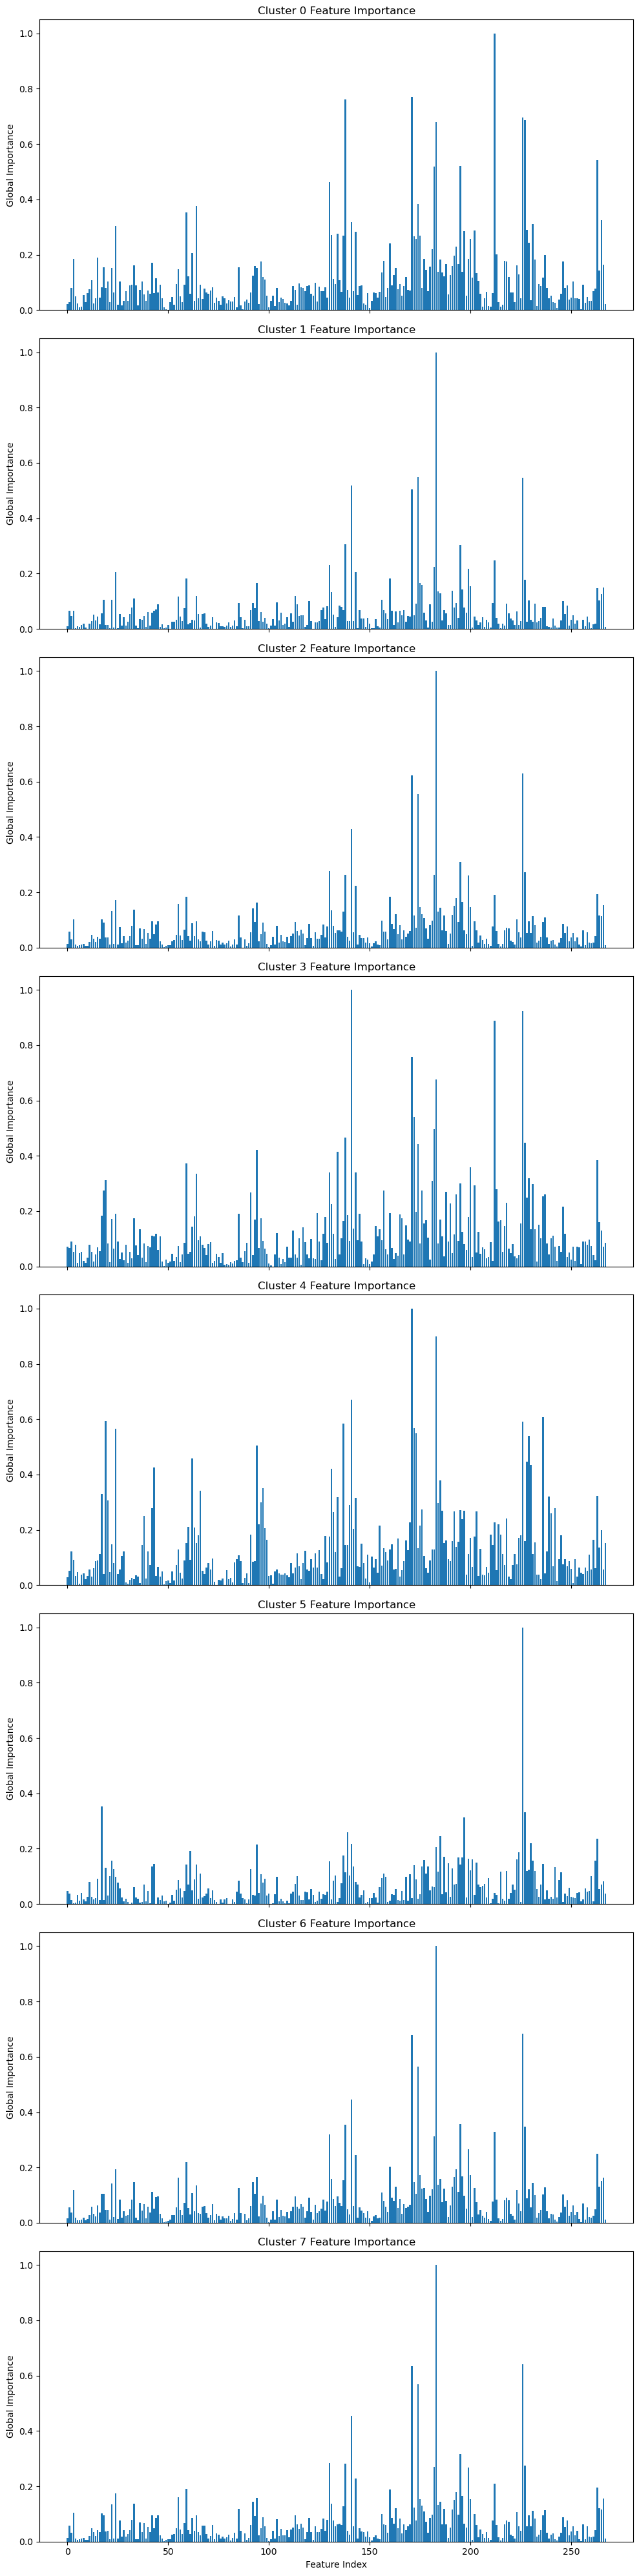

In [43]:
# Compute LRP, getting aggregated R0 and per-cluster R0
R0_sum, R0_sum_per_cluster = lrp_gmvae_single(model, X_batch1, latent_index=None)  # R0_sum_per_cluster: [batch, k, in_dim]

# Reshape assuming features grouped by 3 (e.g., coordinates); adjust if needed
num_features = R0_sum_per_cluster.size(2) // 3
k = model.k

# Process and normalize per cluster
global_importance_per_cluster = []
for cluster_idx in range(k):
    R0_cluster = R0_sum_per_cluster[:, cluster_idx, :]  # [batch, in_dim]
    R0_cluster = R0_cluster.reshape(R0_cluster.size(0), num_features, 3)
    R0_cluster_mean = R0_cluster.mean(dim=2)  # [batch, num_features]
    importance_cluster = R0_cluster_mean.abs().mean(dim=0)  # [num_features]
    importance_cluster = importance_cluster.cpu().detach().numpy()
    
    # Normalize per cluster
    min_val = importance_cluster.min()
    max_val = importance_cluster.max()
    importance_cluster_norm = (importance_cluster - min_val) / (max_val - min_val + 1e-10)
    global_importance_per_cluster.append(importance_cluster_norm)

# Visualization: Subplots for each cluster
fig, axs = plt.subplots(k, 1, figsize=(10, 5 * k), sharex=True)
for cluster_idx in range(k):
    axs[cluster_idx].bar(range(len(global_importance_per_cluster[cluster_idx])), global_importance_per_cluster[cluster_idx])
    axs[cluster_idx].set_ylabel('Global Importance')
    axs[cluster_idx].set_title(f'Cluster {cluster_idx} Feature Importance')
axs[-1].set_xlabel('Feature Index')
plt.tight_layout()
plt.show()

In [ ]:
import sys
sys.path.append("..")  # Ensure the parent directory is in the path
from models.spib import SPIB
import torch
# Initialize the SPIB model
n_cvs = 1
output_dim = 2
k = 10
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SPIB(n_cvs, output_dim, k, device)
print(model)



In [ ]:
from mlcolvar.data import DictModule
from mlcolvar.data import DictDataset
from mlcolvar.utils.trainer import MetricsCallback
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
import torch
import lightning
import numpy as np

traj = np.load("../data/Four_Well_beta3_gamma4_traj_data.npy")  # Load the trajectory data
# traj = torch.load("../data/Four_Well_beta3_gamma4_traj_data.pt
dataset = DictDataset({"data": torch.tensor(traj).float(), "target": torch.tensor(traj).float(), "labels": torch.zeros(traj.shape[0], 10).float()})

datamodule = DictModule(dataset,
                        batch_size = 512,
                        lengths=[1.0, 0.0],
                        shuffle = True)


# define callbacks
metrics = MetricsCallback()

# Early stopping
early_stopping = EarlyStopping(
    monitor="valid_loss",
    patience=10,
    verbose=True,
    mode="min",
)

# define hyperparameters 
max_epochs = 35
logger = None  #lightning.pytorch.loggers.TensorBoardLogger(save_dir="logs/", name="test", version=0)
enable_checkpointing = False

# define trainer
trainer = lightning.Trainer(callbacks=[metrics],  # [early_stopping, metrics]
                            max_epochs=max_epochs,
                            logger=logger,
                            enable_checkpointing=enable_checkpointing,
                            )

trainer.fit(model, datamodule)

In [ ]:
import numpy as np

x = np.load("test_model_results.npz", allow_pickle=True)
print(x)
print(x['xhat'].shape)
print(x['eval_loss'])
print(x['z'].shape)

np.save("test_model_z.npy", x['z'])

import torch
output_file = "1NE4_6NO7_b.dcd.pt"
x_ref = torch.load(output_file, map_location=torch.device('cpu'))
print(x_ref['data'])

NpzFile 'test_model_results.npz' with keys: xhat, z, z_mean, z_logvar, eval_loss
(275, 804)
1.356432420015335
(275, 3)
[[ 1.255     -1.3772     1.656     ...  3.0469     2.7417     6.2181   ]
 [ 1.3731    -1.3932     1.6256001 ...  3.0419002  2.7468002  6.1959   ]
 [ 1.3089    -1.375      1.6279    ...  3.0472     2.7562     6.2067003]
 ...
 [ 1.731     -0.721      4.0938    ...  4.032      1.3560001  6.9825997]
 [ 1.6920999 -0.7194     4.107     ...  4.0467     1.3416001  6.9609003]
 [ 1.7277001 -0.7161     4.1114    ...  4.0366     1.3475001  6.9672   ]]
